In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn import linear_model
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsRegressor
from KCrossVal import kFoldCross, MeanAbsError, BinaryAccuracy
import time

In [79]:
dataset_df = pd.read_csv('./data/diabetes.csv')
# shuffle
dataset_df = dataset_df.sample(frac=1)

X_df = dataset_df[dataset_df.columns[:-1]]
Y_df = dataset_df[dataset_df.columns[-1]]
## Normalization
X_df = (X_df - X_df.mean()) / X_df.std()

X = X_df.to_numpy()
Y = Y_df.to_numpy()

In [80]:
# Logistic Regression
# HP tuning with k-cross validation
C_values = [0.1,1,10,100]
results = []
for C in C_values:
    reg = linear_model.LogisticRegression(C=C)
    res = kFoldCross(reg.fit, reg.predict, X, Y, 5, MeanAbsError)
    res = C, res[0], res[1], res[3]
    results.append(res)

df = pd.DataFrame(results, columns=['C', 'ValErr_mean', 'ValErr_std', 'seconds'])
df.sort_values(by='ValErr_mean')

,C,ValErr_mean,ValErr_std,seconds
1,1.0,0.231644,0.044810,0.037921
2,10.0,0.231644,0.044810,0.022104
3,100.0,0.231644,0.044810,0.021183
0,0.1,0.238163,0.041912,0.038680


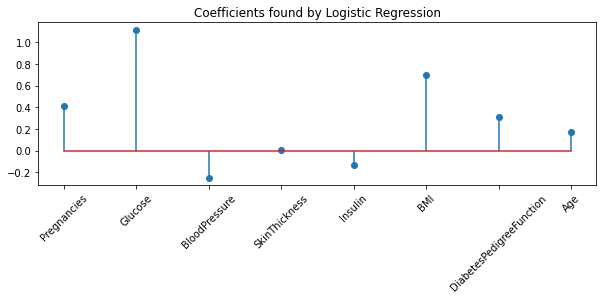

In [68]:
reg = linear_model.LogisticRegression(C=2.0)
reg.fit(X,Y)
fig, ax = plt.subplots(figsize=(10,3))
y = reg.coef_.ravel()
ax.stem(y)
plt.xticks(ticks=range(len(y)),labels=dataset_df.columns[:-1],rotation=45)
plt.title('Coefficients found by Logistic Regression')
None

In [12]:
# Linear Regression
# HP tuning with k-cross validation
# error is measured with output made binary: out = 0 if out<0, else out=1

alpha = [1,10,20,30]
results = []
for a in alpha:
    reg = linear_model.Ridge(alpha=a)
    res = kFoldCross(reg.fit, reg.predict, X, Y-0.5, 5, BinaryAccuracy)
    res = a, res[0], res[1], res[3]
    results.append(res)

df = pd.DataFrame(results, columns=['alpha', 'ValErr_mean', 'ValErr_std', 'seconds'])
df.sort_values(by='ValErr_mean')

,alpha,ValErr_mean,ValErr_std,seconds
0,1,0.225261,0.016740,0.011708
1,10,0.226560,0.015544,0.008780
2,20,0.227867,0.014833,0.009192
3,30,0.227867,0.014833,0.009508
